In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


In [3]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
X.shape

(569, 30)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)

SVC()

In [11]:
y_pred = model.predict(X_test)

In [12]:
print(" Accuracy:", accuracy_score(y_test, y_pred))

 Accuracy: 0.9824561403508771


In [13]:
model2 = SVC(kernel='linear')
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred2))


Accuracy: 0.956140350877193


In [14]:
model3 = SVC(kernel='poly', degree=3)
model3.fit(X_train, y_train)

y_pred3 = model3.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred3))


Accuracy: 0.868421052631579


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


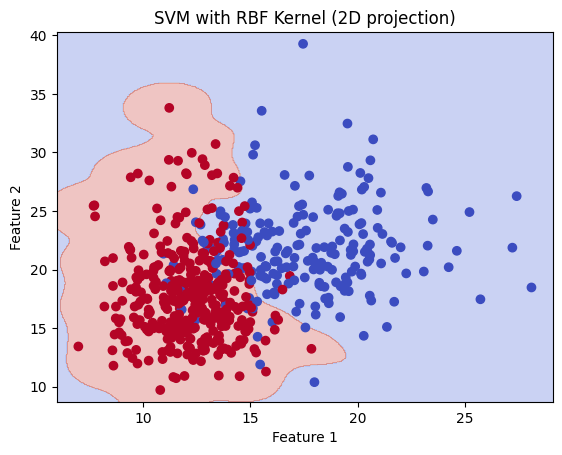

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Take only first two features
X_2d = X.iloc[:, :2]

X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.2, random_state=42)
model = SVC(kernel='rbf', gamma=0.5, C=1.0)
model.fit(X_train, y_train)

# Create grid
xx, yy = np.meshgrid(np.linspace(X_2d.iloc[:,0].min()-1, X_2d.iloc[:,0].max()+1, 500),
                     np.linspace(X_2d.iloc[:,1].min()-1, X_2d.iloc[:,1].max()+1, 500))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_2d.iloc[:,0], X_2d.iloc[:,1], c=y, cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM with RBF Kernel (2D projection)')
plt.show()
